In [1]:
import numpy as np
import os 
import importlib 
import src.flow_ot as flow_ot
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

os.getcwd()

'/Users/kaihung/optimalEnsemble/OTFactorDiscovery'

Centers: [[-1.65955991  4.40648987]
 [-9.9977125  -3.95334855]
 [-7.06488218 -8.1532281 ]]


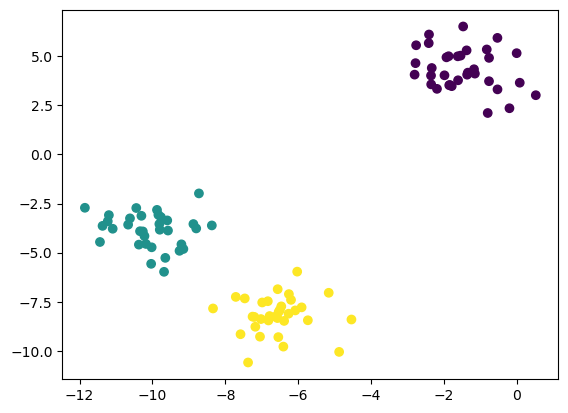

In [2]:
# Experimental set-up, generate data points X from a mixture of Gaussians. 
# We will use the first two dimensions of X as the observed data points and
# the last two dimensions as the hidden factors.
X, z, centers = make_blobs(n_samples=100, centers=3, n_features=2, random_state=1, return_centers=True)
z = z.reshape(100, 1)
plt.scatter(X[:, 0], X[:, 1], c=z)
print("Centers:", centers)

In [3]:
def run_bary_experiment(y_init, X, z, lam, verbose, lr=0.01, max_iter=1000, adaptive_lr=False, scaled_vis=True): 
    # Run the barycenter experiment
    y = flow_ot.compute_barycenter(X, z, y_init, lam=lam, barycenter_cost_grad=flow_ot.gaussian_kernel_kl_grad,
                                   verbose=verbose, lr=lr, max_iter=max_iter, adaptive_lr=adaptive_lr)
    # Plot the results
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.scatter(X[:, 0], X[:, 1], c=z)
    if scaled_vis: 
        plt.xlim(-15, 15)
        plt.ylim(-15, 15)
    plt.title("Original X distribution")
    plt.subplot(1, 3, 2)
    plt.scatter(y_init[:, 0], y_init[:, 1], c=z)
    if scaled_vis: 
        plt.xlim(-15, 15)
        plt.ylim(-15, 15)
    plt.title("Initial y distribution")
    plt.subplot(1, 3, 3)
    plt.scatter(y[:, 0], y[:, 1], c=z)
    if scaled_vis: 
        plt.xlim(-15, 15)
        plt.ylim(-15, 15)
    plt.title("Final y distribution")
    plt.show()
    # return the experimental results 
    return y

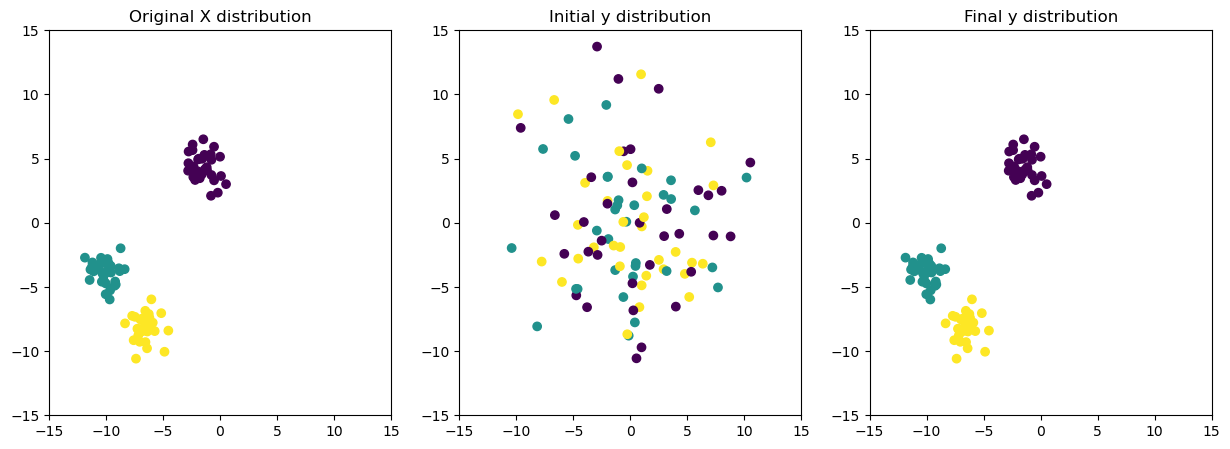

In [5]:
np.random.seed(26)
gauss_grid = np.random.randn(X.shape[0], X.shape[1]) * 5
y = run_bary_experiment(gauss_grid, X, z, lam=0.1, verbose=0, lr=0.01, max_iter=1000, adaptive_lr=False, scaled_vis=True)

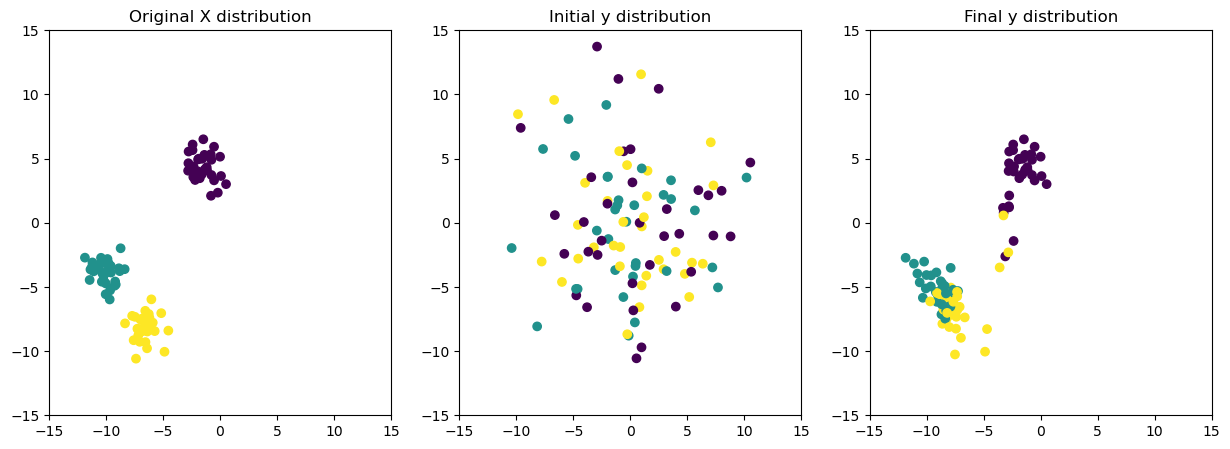

In [6]:
np.random.seed(26)
gauss_grid = np.random.randn(X.shape[0], X.shape[1]) * 5
y = run_bary_experiment(gauss_grid, X, z, lam=25, verbose=0, lr=0.01, max_iter=1000, adaptive_lr=False, scaled_vis=True)

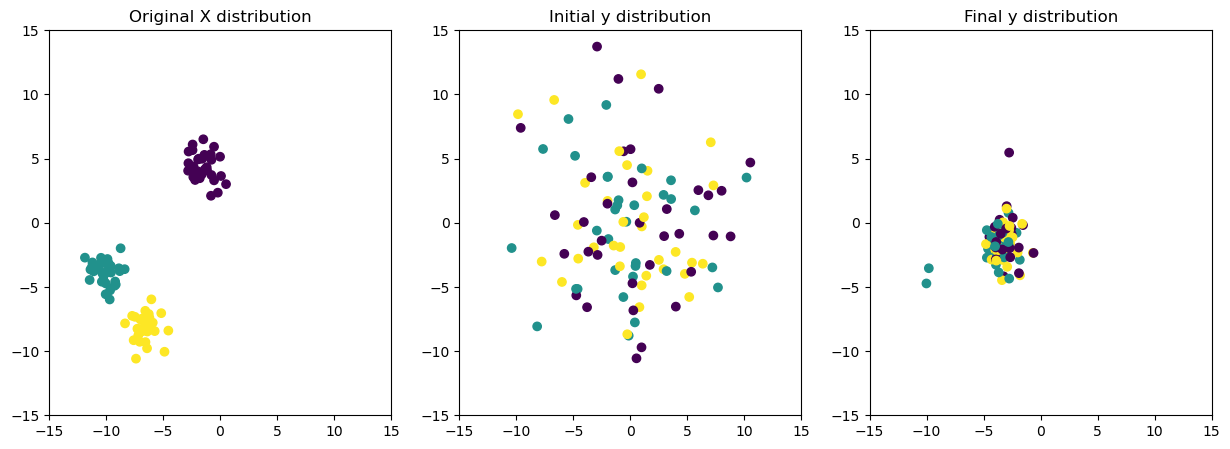

In [7]:
np.random.seed(26)
gauss_grid = np.random.randn(X.shape[0], X.shape[1]) * 5
y = run_bary_experiment(gauss_grid, X, z, lam=250, verbose=0, lr=0.01, max_iter=1000, adaptive_lr=False, scaled_vis=True)